<a href="https://colab.research.google.com/github/akashj30/Machine-Learning/blob/main/Clustring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Unsupervised Machine Learning

No Target Feature for Predication



### Clustring

Main goal is to categorize similar points together

### K-means clustering


Centroid (average of x and average of y)



In [1]:
%pip install yellowbrick plotly nbformat


In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import pandas as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/Mall_Customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Perform customer segmentation based on Age, Income and spending


### Perform Basic Data quality checks

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Spending    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isna().sum()


,0
CustomerID,0
Gender,0
Age,0
Income,0
Spending,0


In [6]:
df.duplicated().sum()


0

### Seperate the X values


In [7]:
X = df.loc[:,["Age", "Income", "Spending"]]
X.head()

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [8]:
import plotly.express as px
fig1 = px.scatter_3d(
    X,
    x = "Age",
    y = "Income",
    z = "Spending",
    title = "Age, Income, Spending"
)
fig1.show()

Perform preprocessing on X


In [9]:
X.dtypes


,0
Age,int64
Income,int64
Spending,int64


In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [11]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [12]:

X_pre = num_pipe.fit_transform(X)
X_pre.head()

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


### Deciding optimal number of clusters with elbow method


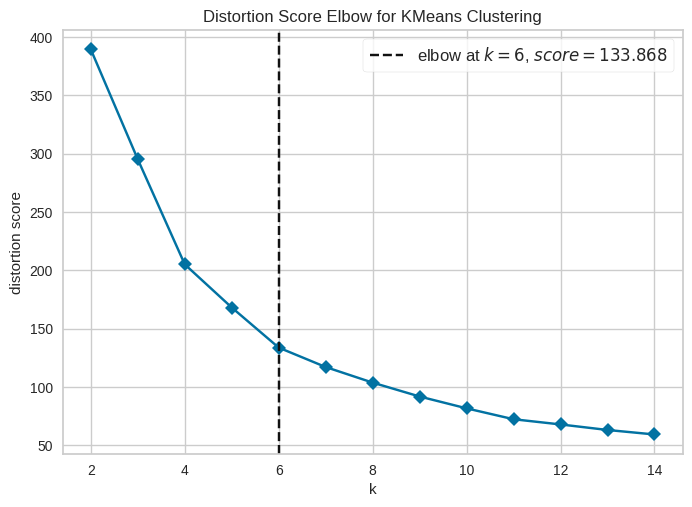

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model1 = KMeans()

visualizer = KElbowVisualizer(model1, k=(2, 15), timings=False)
visualizer.fit(X_pre)
visualizer.show()

From above graph best cluster found at k=6


In [14]:

best_kmeans = KMeans(n_clusters=6)
best_kmeans.fit(X_pre)

KMeans(n_clusters=6)

In [15]:

lb1 = best_kmeans.labels_
lb1

array([0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 5,
       3, 0, 1, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5,
       1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 5, 5, 1, 1, 5, 1, 1, 5, 1, 1, 5,
       5, 1, 1, 5, 1, 5, 5, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 1, 1,
       1, 5, 5, 5, 5, 5, 1, 1, 1, 1, 5, 5, 5, 2, 5, 2, 4, 2, 4, 2, 4, 2,
       5, 2, 4, 2, 4, 2, 4, 2, 4, 2, 5, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

In [16]:
X1=X.copy()
X1["Cluster"] = lb1
X1.head()

,Age,Income,Spending,Cluster
0,19,15,39,0
1,21,15,81,0
2,20,16,6,3
3,23,16,77,0
4,31,17,40,3


In [17]:
X1.query("Cluster == 0")


,Age,Income,Spending,Cluster
0,19,15,39,0
1,21,15,81,0
3,23,16,77,0
5,22,17,76,0
7,23,18,94,0
9,30,19,72,0
11,35,19,99,0
13,24,20,77,0
15,22,20,79,0
17,20,21,66,0


In [18]:
X1.query("Cluster == 1")


,Age,Income,Spending,Cluster
40,65,38,35,1
46,50,40,55,1
50,49,42,52,1
53,59,43,60,1
54,50,43,45,1
55,47,43,41,1
56,51,44,50,1
57,69,44,46,1
59,53,46,46,1
60,70,46,56,1


In [19]:
for i in range(6):
  print(f"Cluster : {i}\n")
  display(X1.query(f"Cluster == {i}"))
  print("\n===========================================\n")

Cluster : 0



,Age,Income,Spending,Cluster
0,19,15,39,0
1,21,15,81,0
3,23,16,77,0
5,22,17,76,0
7,23,18,94,0
9,30,19,72,0
11,35,19,99,0
13,24,20,77,0
15,22,20,79,0
17,20,21,66,0




Cluster : 1



,Age,Income,Spending,Cluster
40,65,38,35,1
46,50,40,55,1
50,49,42,52,1
53,59,43,60,1
54,50,43,45,1
55,47,43,41,1
56,51,44,50,1
57,69,44,46,1
59,53,46,46,1
60,70,46,56,1




Cluster : 2



,Age,Income,Spending,Cluster
123,39,69,91,2
125,31,70,77,2
127,40,71,95,2
129,38,71,75,2
131,39,71,75,2
133,31,72,71,2
135,29,73,88,2
137,32,73,73,2
139,35,74,72,2
141,32,75,93,2




Cluster : 3



,Age,Income,Spending,Cluster
2,20,16,6,3
4,31,17,40,3
6,35,18,6,3
8,64,19,3,3
10,67,19,14,3
12,58,20,15,3
14,37,20,13,3
16,35,21,35,3
18,52,23,29,3
20,35,24,35,3




Cluster : 4



,Age,Income,Spending,Cluster
126,43,71,35,4
128,59,71,11,4
130,47,71,9,4
134,20,73,5,4
136,44,73,7,4
138,19,74,10,4
140,57,75,5,4
144,25,77,12,4
146,48,77,36,4
148,34,78,22,4




Cluster : 5



,Age,Income,Spending,Cluster
43,31,39,61,5
47,27,40,47,5
48,29,40,42,5
49,31,40,42,5
51,33,42,60,5
52,31,43,54,5
58,27,46,51,5
61,19,46,55,5
65,18,48,59,5
68,19,48,59,5


In [20]:

fig2 = px.scatter_3d(
    X1,
    x = "Age",
    y = "Income",
    z = "Spending",
    color = "Cluster",
    title = "Customer Segmentation"
)
fig2.show()

### Agglomerative Clustering


Find out optimal number of clusters with yellowbricks


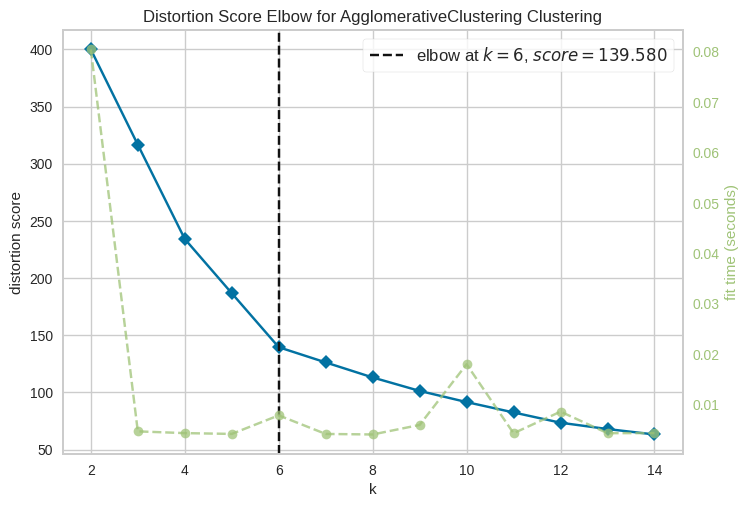

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
from sklearn.cluster import AgglomerativeClustering
model2 = AgglomerativeClustering()
visualizer2 = KElbowVisualizer(model2, k=(2,15))
visualizer2.fit(X_pre)
visualizer2.show()

In [22]:
best_agc = AgglomerativeClustering(n_clusters=6)
best_agc.fit(X_pre)

AgglomerativeClustering(n_clusters=6)

In [23]:

lb2 = best_agc.labels_
lb2

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 0, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 1, 5, 4, 0,
       4, 5, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [24]:
X.head()


,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [25]:
X2 = X.copy()
X2["Cluster"] = lb2
X2.head()

,Age,Income,Spending,Cluster
0,19,15,39,4
1,21,15,81,5
2,20,16,6,4
3,23,16,77,5
4,31,17,40,4


In [26]:

for i in range(6):
    print(f"Cluster : {i}\n")
    display(X2.query(f"Cluster == {i}"))
    print('\n======================================\n')

Cluster : 0



,Age,Income,Spending,Cluster
27,35,28,61,0
43,31,39,61,0
47,27,40,47,0
48,29,40,42,0
49,31,40,42,0
51,33,42,60,0
52,31,43,54,0
58,27,46,51,0
61,19,46,55,0
65,18,48,59,0




Cluster : 1



,Age,Income,Spending,Cluster
40,65,38,35,1
46,50,40,55,1
50,49,42,52,1
53,59,43,60,1
54,50,43,45,1
55,47,43,41,1
56,51,44,50,1
57,69,44,46,1
59,53,46,46,1
60,70,46,56,1




Cluster : 2



,Age,Income,Spending,Cluster
123,39,69,91,2
125,31,70,77,2
127,40,71,95,2
129,38,71,75,2
131,39,71,75,2
133,31,72,71,2
135,29,73,88,2
137,32,73,73,2
139,35,74,72,2
141,32,75,93,2




Cluster : 3



,Age,Income,Spending,Cluster
128,59,71,11,3
130,47,71,9,3
136,44,73,7,3
140,57,75,5,3
148,34,78,22,3
150,43,78,17,3
152,44,78,20,3
154,47,78,16,3
156,37,78,1,3
158,34,78,1,3




Cluster : 4



,Age,Income,Spending,Cluster
0,19,15,39,4
2,20,16,6,4
4,31,17,40,4
6,35,18,6,4
8,64,19,3,4
10,67,19,14,4
12,58,20,15,4
14,37,20,13,4
16,35,21,35,4
18,52,23,29,4




Cluster : 5



,Age,Income,Spending,Cluster
1,21,15,81,5
3,23,16,77,5
5,22,17,76,5
7,23,18,94,5
9,30,19,72,5
11,35,19,99,5
13,24,20,77,5
15,22,20,79,5
17,20,21,66,5
19,35,23,98,5


In [27]:
X2.groupby(by="Cluster").describe().T


Cluster                 0          1           2           3          4  \
Age      count  45.000000  45.000000   39.000000   28.000000  22.000000   
         mean   27.377778  56.400000   32.692308   43.892857  44.318182   
         std     7.758540   8.373117    3.728650    8.337063  12.800247   
         min    18.000000  43.000000   27.000000   32.000000  19.000000   
         25%    20.000000  49.000000   30.000000   36.750000  35.250000   
         50%    26.000000  54.000000   32.000000   43.500000  45.500000   
         75%    32.000000  65.000000   35.500000   47.750000  52.750000   
         max    45.000000  70.000000   40.000000   59.000000  67.000000   
Income   count  45.000000  45.000000   39.000000   28.000000  22.000000   
         mean   57.511111  55.288889   86.538462   91.285714  25.772727   
         std    11.750478   9.834129   16.312485   16.915601   7.646548   
         min    28.000000  38.000000   69.000000   71.000000  15.000000   
         25%    48.000000  47.000000   75.500000   78.000000  19.250000   
         50%    60.000000  54.000000   79.000000   87.000000  24.500000   
         75%    65.000000  63.000000   95.000000   99.500000  32.250000   
         max    81.000000  79.000000  137.000000  137.000000  39.000000   
Spending count  45.000000  45.000000   39.000000   28.000000  22.000000   
         mean   45.844444  48.355556   82.128205   16.678571  20.272727   
         std    14.108275   6.869417    9.364489    8.973432  12.947446   
         min     5.000000  35.000000   63.000000    1.000000   3.000000   
         25%    42.000000  43.000000   74.500000   10.750000   7.750000   
         50%    50.000000  48.000000   83.000000   16.000000  16.000000   
         75%    55.000000  55.000000   90.000000   22.250000  31.750000   
         max    61.000000  60.000000   97.000000   39.000000  40.000000   

Cluster                 5  
Age      count  21.000000  
         mean   24.809524  
         std     4.905294  
         min    18.000000  
         25%    21.000000  
         50%    23.000000  
         75%    29.000000  
         max    35.000000  
Income   count  21.000000  
         mean   25.619048  
         std     7.736124  
         min    15.000000  
         25%    19.000000  
         50%    24.000000  
         75%    33.000000  
         max    39.000000  
Spending count  21.000000  
         mean   80.238095  
         std     9.909111  
         min    65.000000  
         25%    73.000000  
         50%    77.000000  
         75%    87.000000  
         max    99.000000

In [28]:
fig3 = px.scatter_3d(
    X2,
    x="Age",
    y="Income",
    z="Spending",
    color="Cluster",
    title = "Agglomerative Clustering"
)
fig3.show()

### From above KMeans has score of 133 approx and AgglomerativeClustering has 139

KMeans model is slightly better here.